In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import pathlib

In [4]:
data_dir = tf.keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar= True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
def display_image_in_actual_size(im_path):
  dpi=100
  im_data= plt.imread(im_path)
  height, widht, depth= im_data.shape
  figsize= widht/float(dpi), height/float(dpi)
  fig= plt.figure(figsize=figsize)
  ax = fig.add_axes([0,0,1,1])
  ax.axis('off')
  ax.imshow(im_data, cmap='gray')
  plt.show()

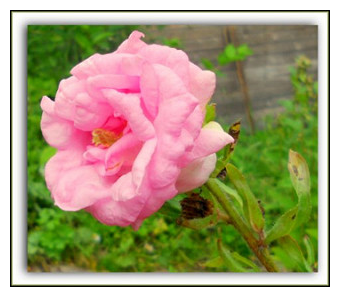

In [6]:
IMAGE_PATH = "/root/.keras/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg"
display_image_in_actual_size(IMAGE_PATH)

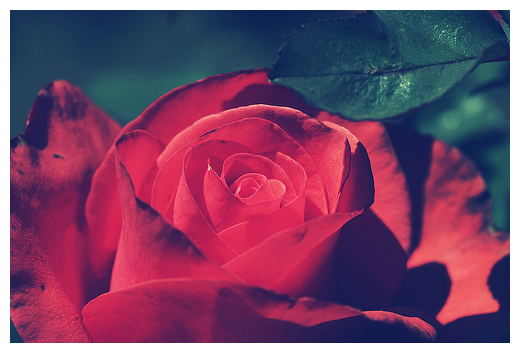

In [9]:
IMAGE_PATH = "/root/.keras/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg"
display_image_in_actual_size(IMAGE_PATH)

In [16]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [18]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [20]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.3516 - loss: 1.5446 - val_accuracy: 0.5736 - val_loss: 1.0994
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.5991 - loss: 1.0073 - val_accuracy: 0.6362 - val_loss: 0.9191
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.6569 - loss: 0.8636 - val_accuracy: 0.6553 - val_loss: 0.8807
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7357 - loss: 0.7156 - val_accuracy: 0.6362 - val_loss: 0.9002
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.7946 - loss: 0.5429 - val_accuracy: 0.6689 - val_loss: 0.8573
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.8848 - loss: 0.3394 - val_accuracy: 0.6594 - val_loss: 1.0045
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9369 - loss: 0.1952 - val_accuracy: 0.6894 - val_loss: 1.0454
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9643 - loss: 0.1107 - val_accuracy: 0.6540 - v

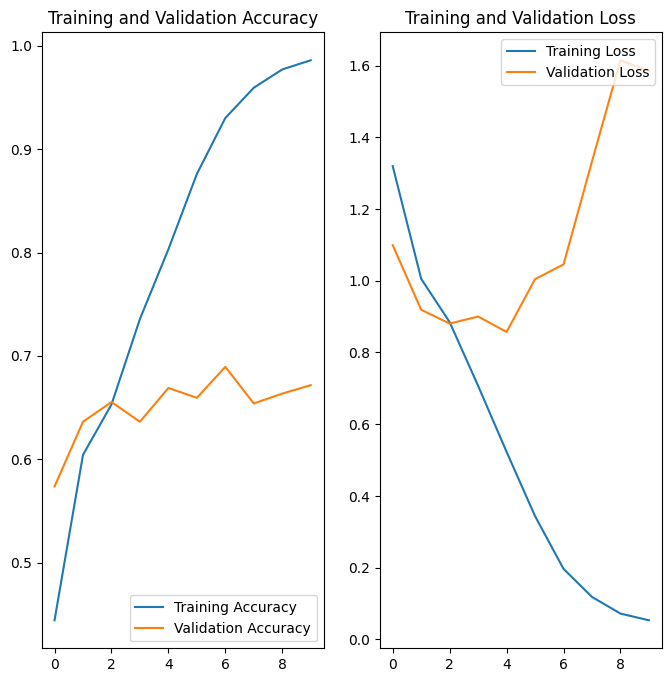

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
image_path = "/root/.keras/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg" # Replace with your test image path
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Use the saved `class_names` variable
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[tf.argmax(score)], 100 * tf.reduce_max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This image most likely belongs to tulips with a 99.95 percent confidence.
